In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

df = pd.read_csv('geodata.csv')
print(df.head())

                       OT      LAT       LON  DEPTH  MAG MAGTYPE    GT
0  1960/08/04T07:34:55.04  51.1132  178.9792   40.0  NaN   nomag  CH03
1  1962/07/07T06:12:48.71  51.1293  178.7581   29.0  NaN   nomag  CH03
2  1963/04/29T21:44:19.88  51.1601  178.7312   54.0  5.9      mb  CH03
3   1963/04/30T03:26:5.79  51.1232  178.6201   34.0  5.4      mb  CH05
4  1963/04/30T07:07:57.15  51.1331  178.6788   48.0  5.8      mb  CH05


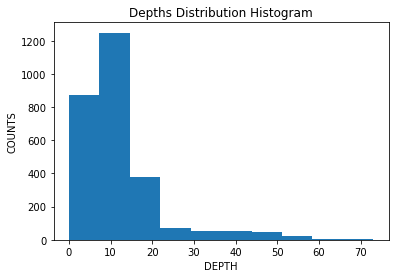

In [4]:
plot.hist(df.DEPTH)
plot.xlabel('DEPTH')
plot.ylabel('COUNTS')
plot.title('Depths Distribution Histogram')
plot.show()

In [5]:
df.DEPTH.describe()

count    2759.000000
mean       12.191337
std        10.097765
min         0.000000
25%         6.800000
50%        10.000000
75%        14.000000
max        73.000000
Name: DEPTH, dtype: float64

In [6]:
df.MAG.describe()

count    2079.000000
mean        3.709072
std         0.984367
min         1.500000
25%         2.900000
50%         3.600000
75%         4.400000
max         7.800000
Name: MAG, dtype: float64

In [7]:
df.MAGTYPE.value_counts()

ml         965
mb         750
nomag      680
Mwr        193
mblg        67
Mww         57
Mw          43
UNKNOWN      3
md           1
Name: MAGTYPE, dtype: int64

In [8]:
df['MAG'] = df['MAG'].fillna(df['MAG'].mean())

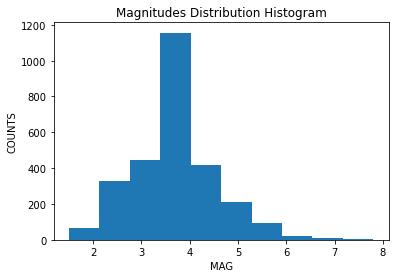

In [9]:
plot.hist(df.MAG)
plot.xlabel('MAG')
plot.ylabel('COUNTS')
plot.title('Magnitudes Distribution Histogram')
plot.show()

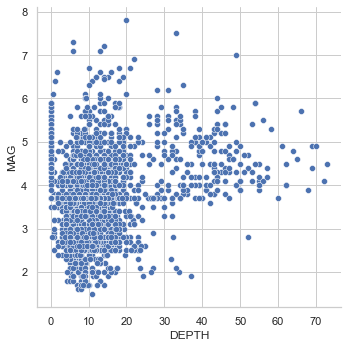

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")
g = sns.relplot(
    data=df,
    x="DEPTH", y="MAG",
)
plot.show()

In [11]:
!pip install folium

In [17]:
import folium
mymap = folium.Map(location = [1.366623, 103.821285], 
                   width = 950, 
                   height = 550,
                   zoom_start = 12, 
                   tiles = 'openstreetmap')
for lat, lng, mag in zip(df['LAT'], df['LON'], df['MAG']):    
    station = folium.CircleMarker(
            location=[lat, lng],
            radius=(mag ** 2) / 3,
            color='blue',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.5)   
    # add the circle marker to the map
    station.add_to(mymap)
mymap